# EO Indices

| Index Name | Index ID | Bands Used | Formula | Application | Reference |
| :---:      | :---:    | :---:      |:---:    | :---:      | :---:     |                                               
| Normalized Difference Vegetation Index | NDVI | NIR, R|\begin{equation*}\frac{NIR-R}{NIR+R}\end{equation*}| Automatically mapping vegetation | Huete, A. |
| Soil-adjusted vegetation index | SAVI | NIR, Red |\begin{equation*}\frac{NIR-Red}{NIR+Red+0.5}* 1.5\end{equation*}| Adjusted NDVI by soil | Huete, A.|
| Modified normalized difference water index | MNDWI | Green, NIR|\begin{equation*}\frac{Green-NIR}{Green+NIR}\end{equation*}| Mapping water areas | Roy et al.|
| Normalized difference built-up index | NDBI | SWIR, NIR|\begin{equation*}\frac{SWIR-NIR}{SWIR+NIR}\end{equation*}| Automatically mapping urban areas | Zha et al.|

## NDVI
Abrimos de Worldview sobre una linea electrica de alta tension y usamos el NDVI para detectar la vegetación.

In [1]:
import os
os.environ['HTTP_PROXY']=""
os.environ['HTTPS_PROXY']=""

In [2]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show

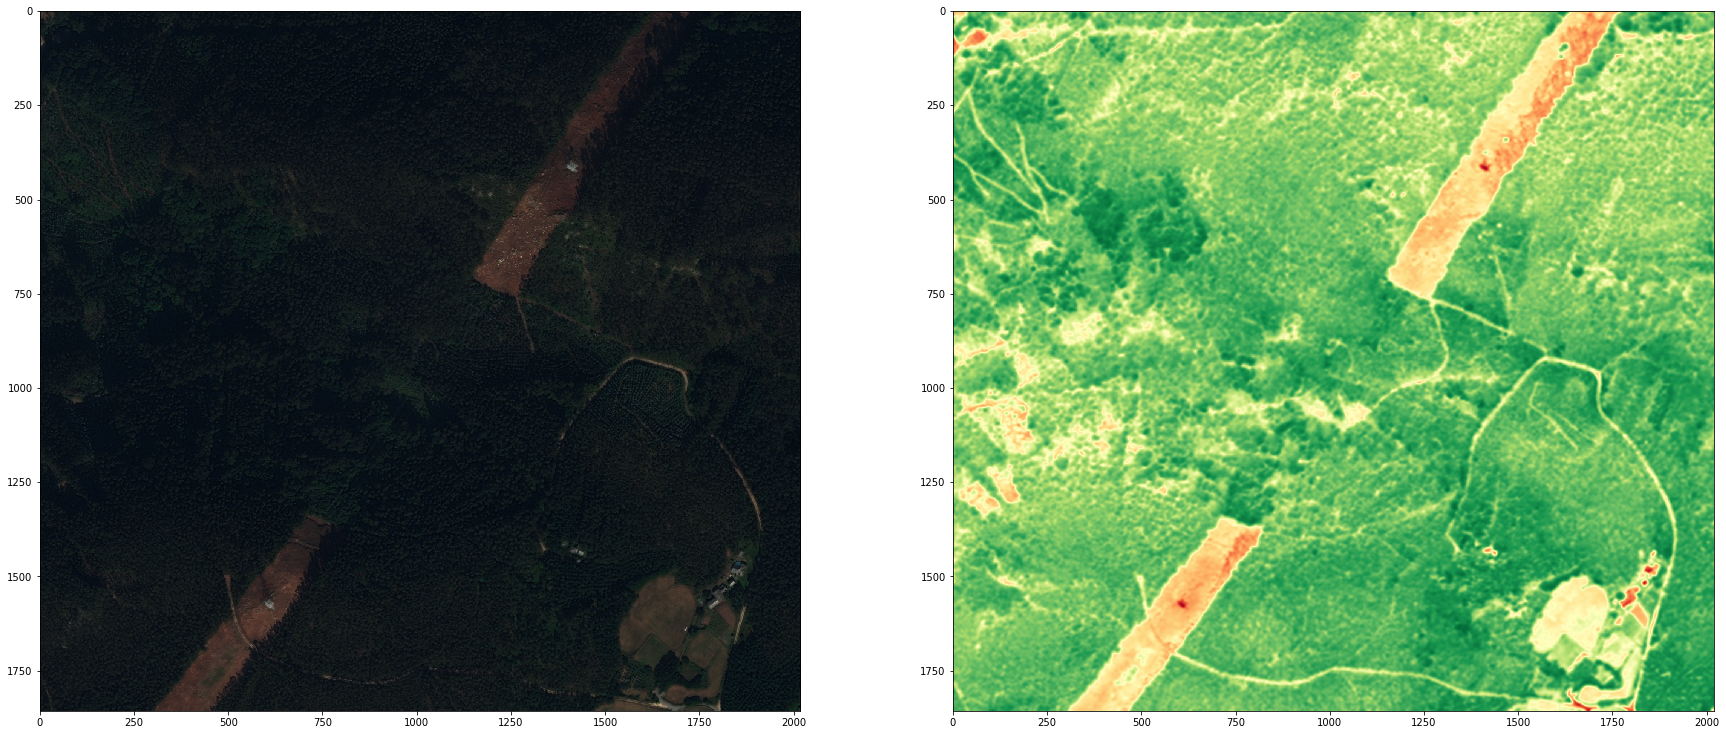

In [3]:
filename = r"https://minsait-geospatial.s3.eu-west-3.amazonaws.com/data/EO_Analytics/EO+Indices/1030050034F8C100_clip.tif"

with rio.open(filename) as src:
    bands = src.read()
    RGB = np.stack((rio.plot.adjust_band(bands[0]),rio.plot.adjust_band(bands[1]),rio.plot.adjust_band(bands[2])))
    NDVI = (bands[3]-bands[0])/ (bands[3]+bands[0])
    fig, (axr, axg) = plt.subplots(1, 2, figsize=(30, 30))
    show(RGB, ax=axr)
    show(NDVI, ax=axg, cmap='RdYlGn')
    plt.show()

## SAVI
Abrimos de Worldview sobre una linea electrica de alta tension y usamos el SAVI para detectar la vegetación.


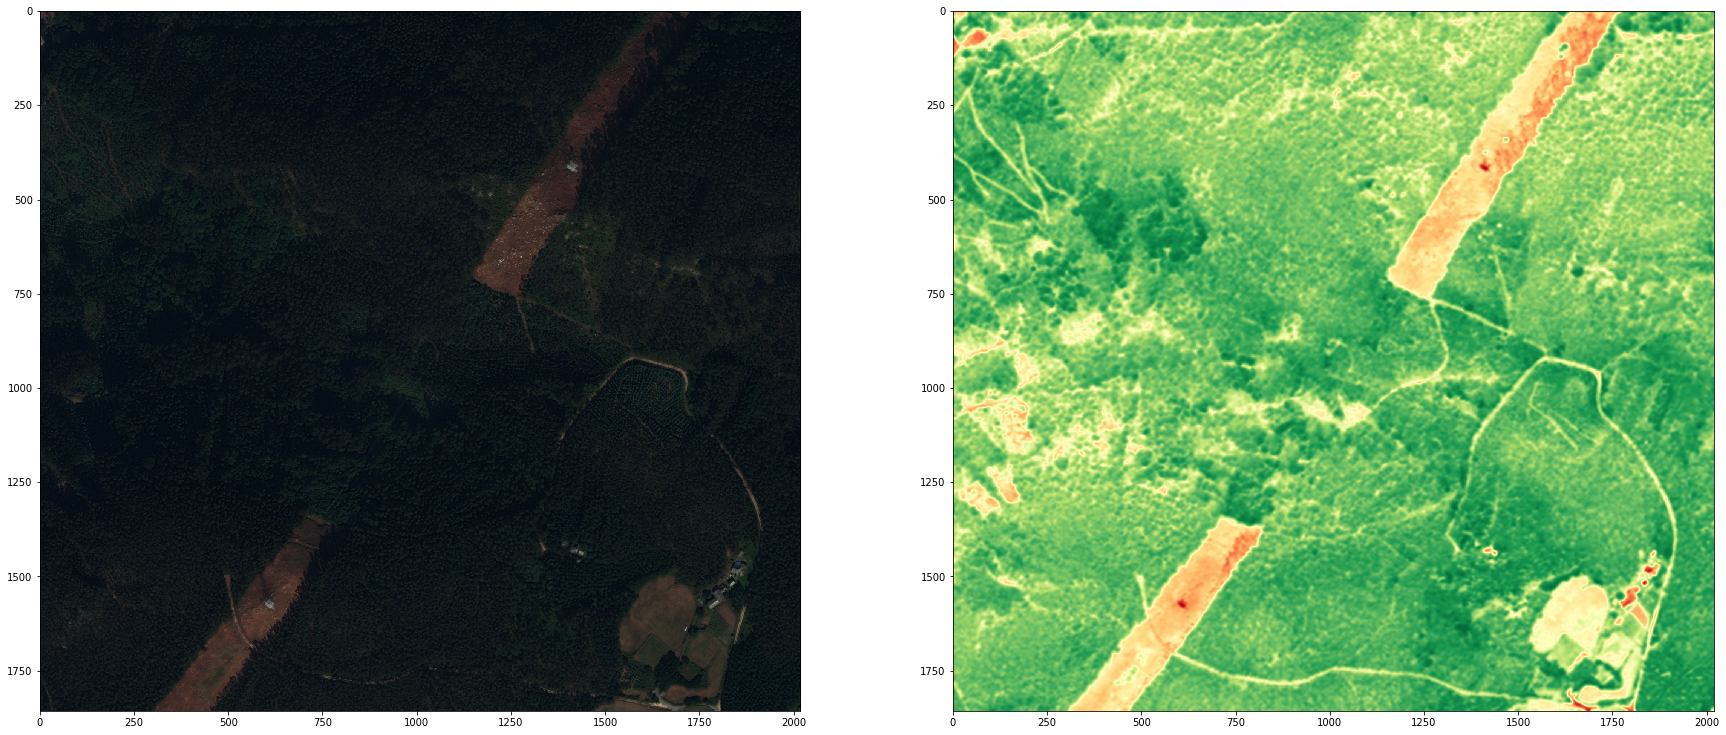

In [4]:
SAVI = (bands[3]-bands[0])/ (bands[3]+bands[0]+0.5)*1.5
fig, (axr, axg) = plt.subplots(1, 2, figsize=(30, 30))
show(RGB, ax=axr)
show(SAVI, ax=axg, cmap='RdYlGn')
plt.show()

## NDBI
Abrimos una imagen de la construccion del Wanda Metropolitano y el NDBI para detectar construcciones y suelo.

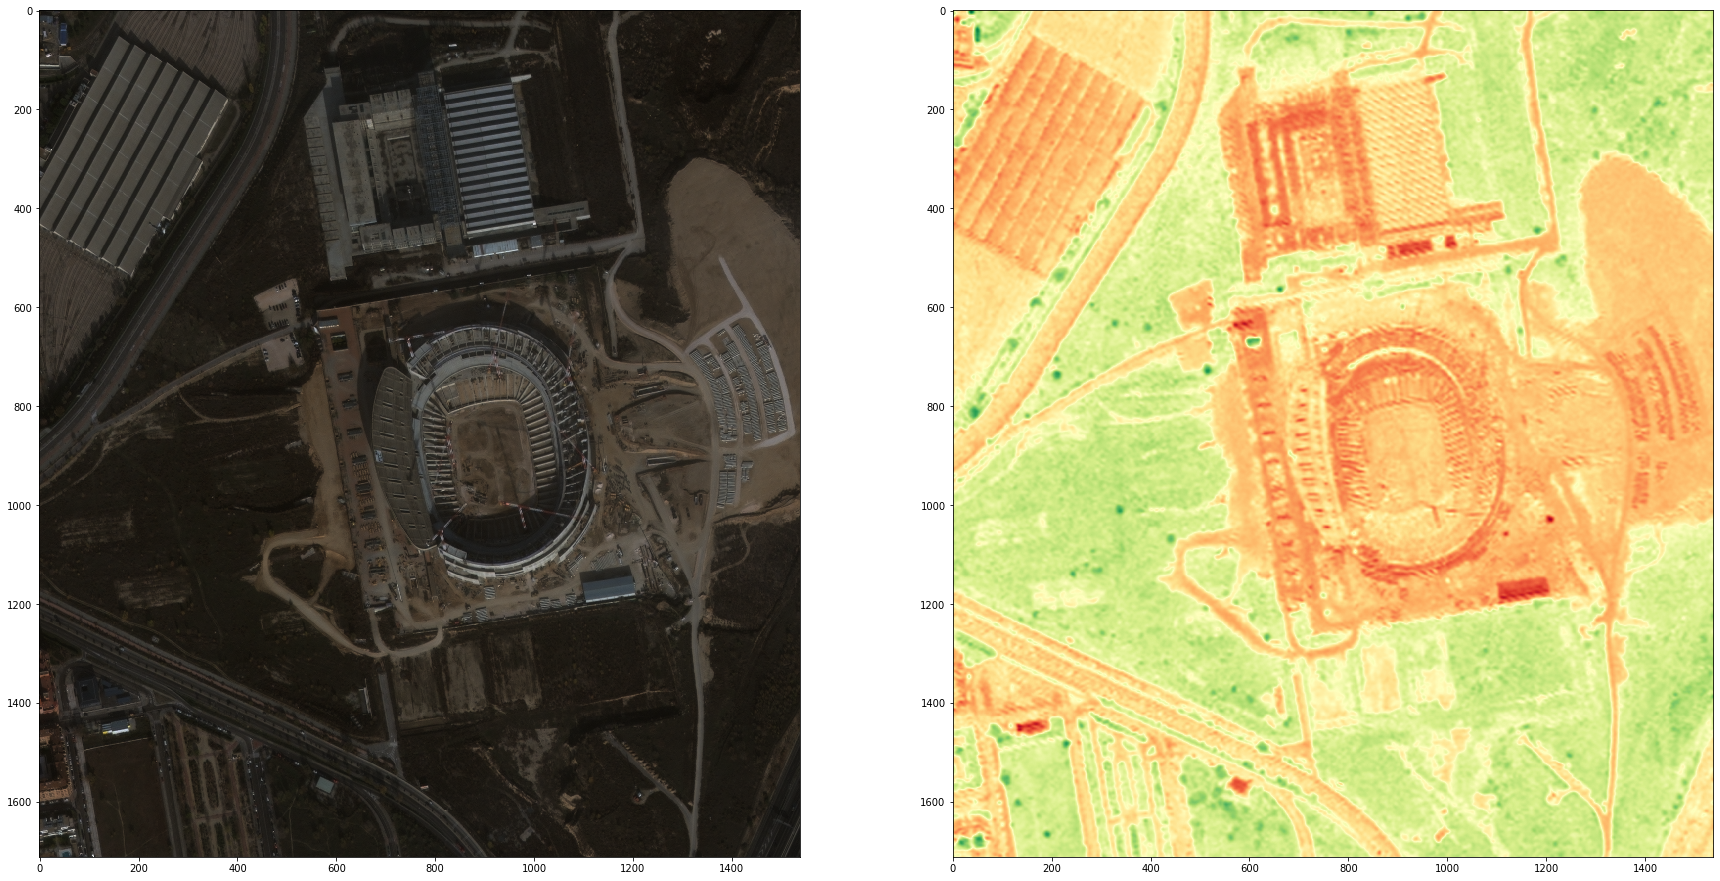

In [5]:
filename = r"https://minsait-geospatial.s3.eu-west-3.amazonaws.com/data/EO_Analytics/EO+Indices/103001004D902C00_pansharpen.tif"
with rio.open(filename) as src:
    bands = src.read()
    RGB = np.stack((rio.plot.adjust_band(bands[4]),rio.plot.adjust_band(bands[2]),rio.plot.adjust_band(bands[1])))
    #NDVI = (bands[1]-bands[3])/ (bands[1]+bands[3])

    NDBI = (bands[7]-bands[5])/ (bands[7]+bands[5])
    fig, (axr, axg) = plt.subplots(1, 2, figsize=(30, 30))
    show(RGB, ax=axr)
    show(NDBI, ax=axg, cmap='RdYlGn')
    plt.show()

## NDWI
Abrimos una imagen de Rapideye de Formentera y usamos NDWI para detectar el agua.

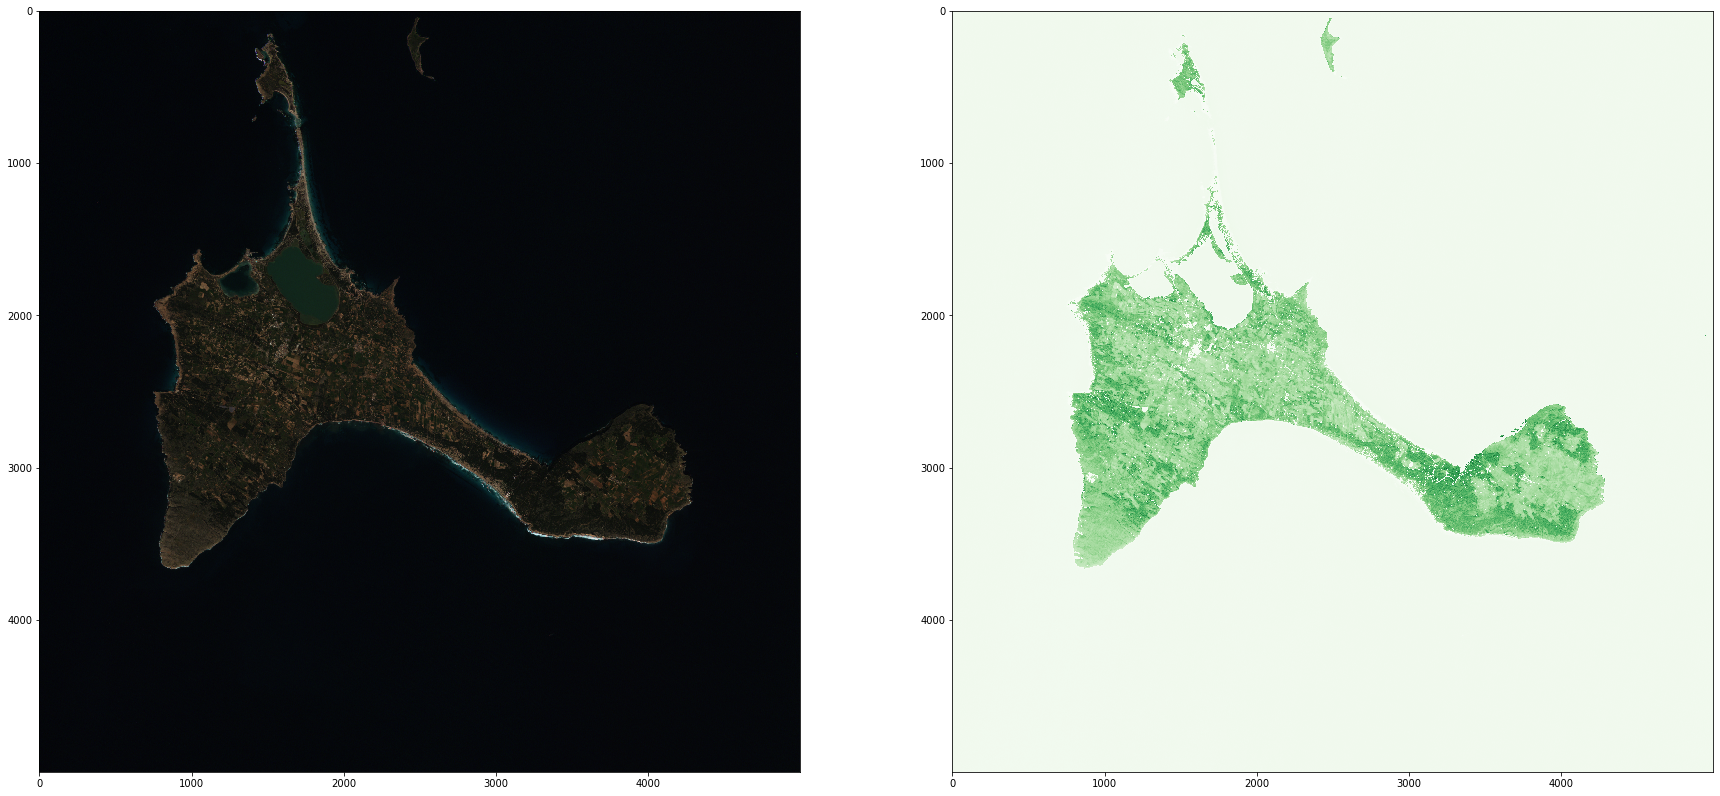

In [6]:
filename = r"https://minsait-geospatial.s3.eu-west-3.amazonaws.com/data/EO_Analytics/EO+Indices/2011-02-18T113832_RE3_3A-NAC_6683682_113276.tif"
with rio.open(filename) as src:
    bands = src.read()
    RGB = np.stack((rio.plot.adjust_band(bands[2]),rio.plot.adjust_band(bands[1]),rio.plot.adjust_band(bands[0])))
    NDWI = (bands[1]-bands[4])/ (bands[1]+bands[4])
    fig, (axr, axg) = plt.subplots(1, 2, figsize=(30, 30))
    show(RGB, ax=axr)
    show(NDWI, ax=axg, cmap='Greens')
    plt.show()